In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_parquet('2_after_feature_extraction/feature_matrix.parquet')

In [3]:
# keep only css features
df_fp = df.drop(columns=['session_id'])
df_fp = df_fp[df_fp.columns[df_fp.columns.str.contains('css:')]]

In [4]:
# Convert each row to tuple so we can count duplicates
fingerprint_hashes = df_fp.apply(lambda row: tuple(row), axis=1)

In [5]:
# Count unique vs duplicates
total = len(fingerprint_hashes)
unique = fingerprint_hashes.nunique()
duplicates = total - unique
collision_rate = duplicates / total

In [6]:
print(f"All features:")
print(f"- Total fingerprints: {total}")
print(f"- Unique fingerprints: {unique}")
print(f"- Collision rate: {collision_rate:.4f} ({duplicates} collisions)")

All features:
- Total fingerprints: 932
- Unique fingerprints: 587
- Collision rate: 0.3702 (345 collisions)\n


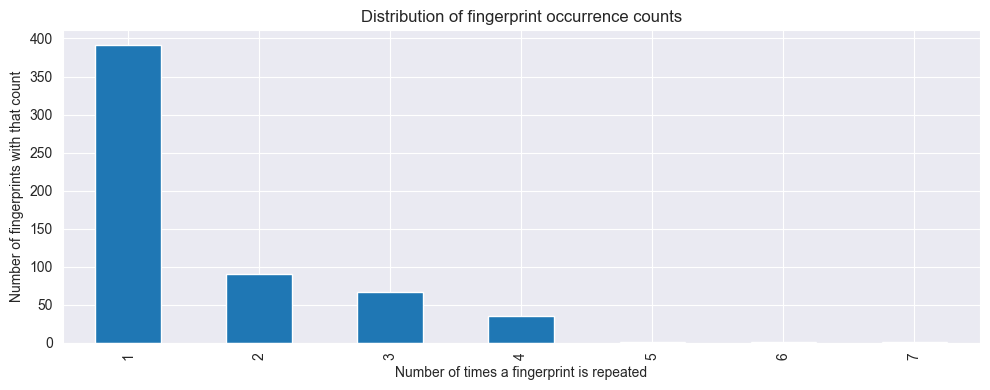

In [7]:
fp_counts = fingerprint_hashes.value_counts()
plt.figure(figsize=(10, 4))
fp_counts.value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of fingerprint occurrence counts")
plt.xlabel("Number of times a fingerprint is repeated")
plt.ylabel("Number of fingerprints with that count")
plt.tight_layout()
plt.show()